# Exploratory Data Analysis

The primary goal of this analysis is to load, inspect, and visualize the store-item demand to uncover underlying patterns, trends and seasonality. The insights gathered here will inform the feature engineering and modeling strategy.

### About the Data

The dataset used in this analysis is from the Kaggle competition, "Store Item Demand Forecasting Challenge." It contains five years of daily sales data for 50 different items across 10 different stores. The primary objective is to accurately forecast the demand for these items. This initial exploration focuses on understanding the overall structure and patterns within this historical sales data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the sales data
df = pd.read_csv('../data/train.csv')

# Setting plot style
sns.set_style('darkgrid')

In [2]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Creating new features from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek   # Where Monday = 0 and Sunday = 6

# Checking that the new columns are correctly added
df.head()

,date,store,item,sales,year,month,dayofweek
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


## Overall Sales Trend

Plotting the total sales over time to do a visual analysis of the sales data.

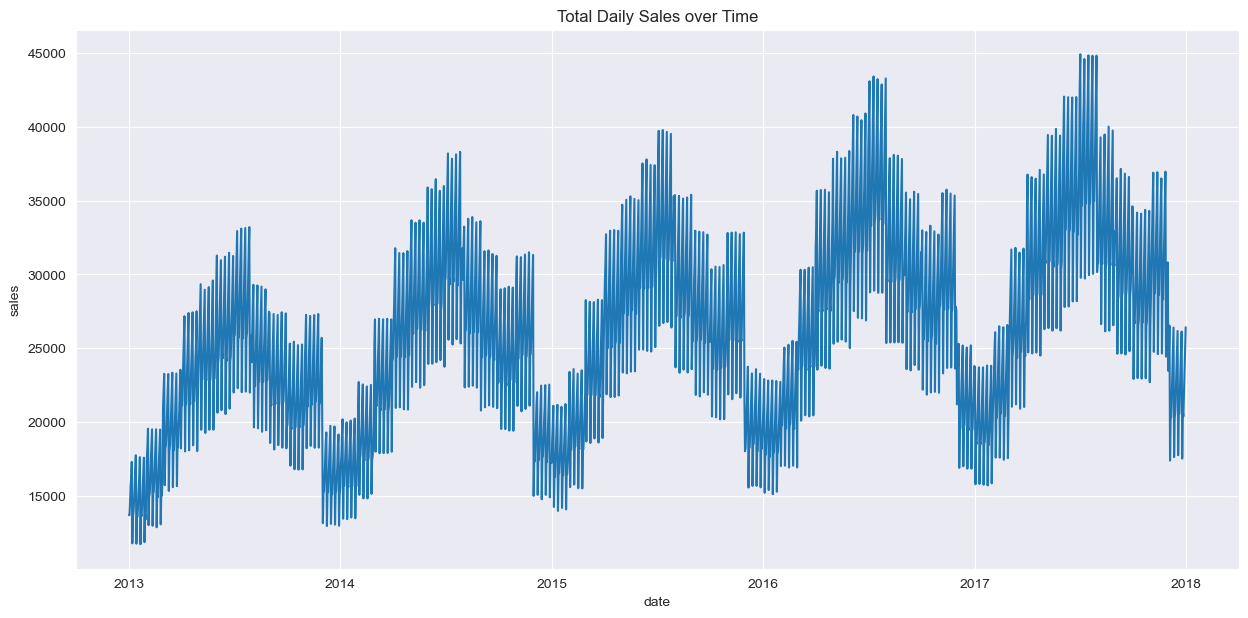

In [3]:
# Aggregate the sales by date
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Creating the plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='sales', data=daily_sales)
plt.title('Total Daily Sales over Time')
plt.show()

### Analysis of Overall Sales Trend

This chart illustrates the total daily sales over a five-year period. It clearly shows three distinct patterns that are critical for understanding the sales performance.

1. **There is a consistent upward trend**

    Tracing the lowest points of the graph, we notice that the sales floor increases each year. The same holds true for the peaks. This steady year-over-year growth indicates a healthy and expanding business.

2. **Strong and predictable annual seasonality**

    The sales data forms a clear and yearly wave-like pattern. Sales consistently peaks during summer before declining to their lowest point during winter. This indicates a strong annual seasonality.

3. **There is a rapid repeating cycle**

    Looking closely at the graph we can see that it is made out of dense, sharp spikes. These rapid movements point at a shorter, possibly weekly, sales rhythm of slow and busy days repeating over and over.

In summary, the sales data are characterized by the patterns discussed above. To better understand these patterns we will use box plots to explore weekly and monthly distributions in greater detail.

## Monthly and Weekly Seasonality

To gain better insights from the seasonality observed above, boxplots will be made to see the statistics of individual days and months.

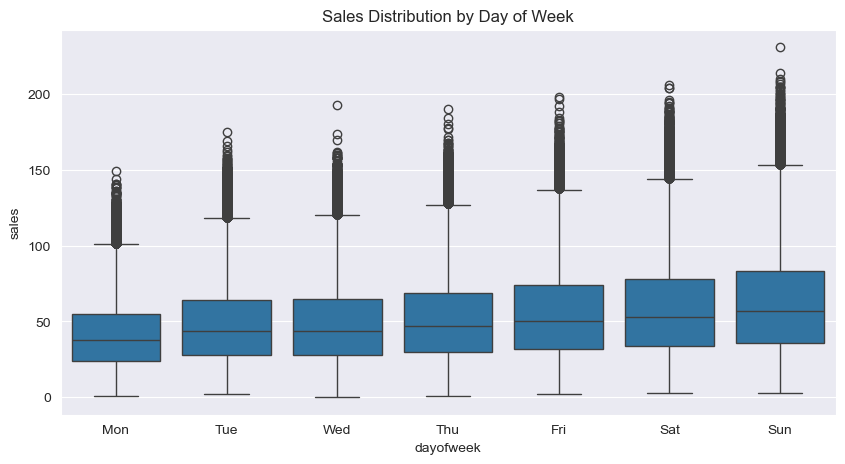

In [4]:
# Sales by Day of Week
plt.figure(figsize=(10, 5))
sns.boxplot(x='dayofweek', y='sales', data=df)
plt.title('Sales Distribution by Day of Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Analysis of Sales Distribution by Day of Week

This chart shows us the rhythm of sales throughout the week. From it we gain two main insights:

1. **The Week Builds to a Weekend Peak**

    The typical sales day is represented by the line inside each blue box. We can clearly see that the line climbs higher each day from Monday, reaching its highest point on Sunday. This confirms a predictable weekly cycle where sales build towards a weekend peak.

2. **A Busier Day Brings Less Predictability**

    From the height of the blue boxes themselves we can see the variability for each sales day. We notice how the height increases throughout the week. Monday's short box show very consistent sales, while Sunday's taller box show a wider range of outcomes. As such, the busiest days are also the least predictable.

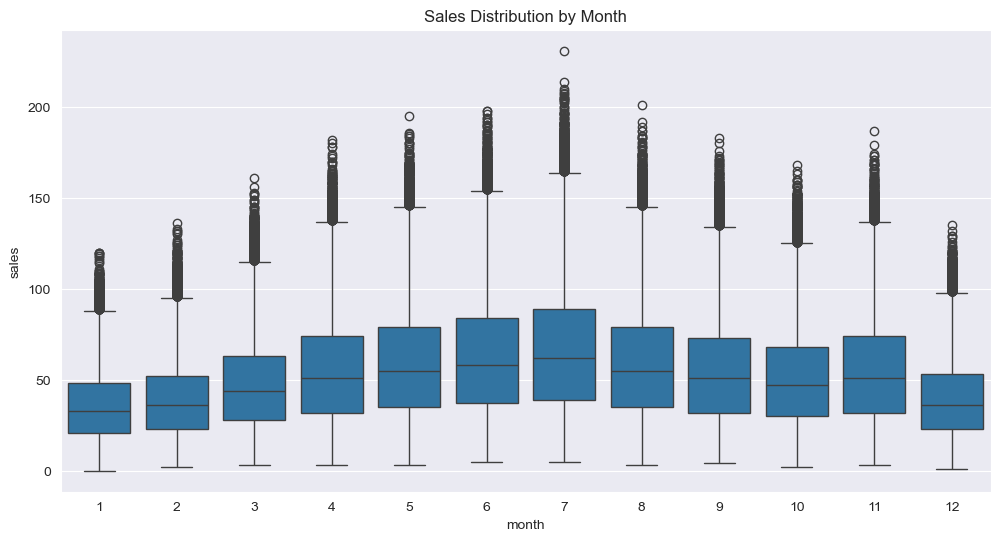

In [5]:
# Sales by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=df)
plt.title('Sales Distribution by Month')
plt.show()

### Analysis of Sales Distribution by Month

Just as we explored the weekly rhythm, this chart lets us take a closer look at the annual wave we saw in the first plot. It reveals a clear and predictable seasonal story.

1. **A Clear Summer Peak in Sales**

    Following the line inside each box again, the typical performance for the month, we see a distinct arch stretching across the year. Sales start the year at their lowest, building up through the spring, reaching their highest point in July. After this peak, the sales gradually decline towards the end of the year, with a slight bump during November.

2. **The busiest months are less predictable**

    A familiar pattern of variability emerges, showing that with increased typical sales comes more uncertainty. The short boxes and comparatievly short lines above each box tell us that almost all sales days fall within a narrower, more predictable range. In contrast, the tall boxes and longer lines during summer show a wider spread in outcomes, meaning that the sales days are less consistent month-to-month during summer.

3. **Exceptional Sales Days are a Summer Phenomenon**

    The lines and dots extending above the boxes show us days with unusually high sales. These are more frequent and reach higher values during the summer months. This suggests that the forces driving the best sales days are strongest during the peak season.

## Conclusion and Next Steps

This exploratory analysis has uncovered the primary patterns shaping the sales data. Starting with a broad view of the five-year trend down to the monthly and daily details, we now have a clearer picture of the features the future model will need to learn.

The key takeaways are:

1. **Consistent Growth**

    There is a clear, positive long-term trend, indicating that sales are growing year-over-year.

2. **Two Powerful Rhythms**

    Sales are affected by two distinct and predictable seasonal cycles. A Weekly Rhythm that builds from a Monday low to a Sunday high, and an Annual Wave that rises from a winter low to a summer high in July.

3. **Volatility is Seasonal**

    The periods of higher sales are also periods of higher variability. This means that the model may find it easier to predict demand during slower periods.

### Implications for Modeling

These insights directly inform the next steps in feature enigeering and model selection:

1. **Time-Based Features are Crucial**

    The model must have features that can capture these patterns. The 'year', 'month' and 'dayofweek' features created during the analysis will be the foundation of the model.

2. **Handling Trend and Seasonality**

    A successful model will need to be able to account for both the long-term upward trend and the dual seasonality. This suggests that models like SARIMA, Prophet or tree-based models with appropriate time-based features will be strong candidates.

3. **Feature Interactions**

    The connection between sales volume and volatility suggests that creating an interaction feature could help the model capture more nuanced patterns.

With the exploratory analysis concluded, we are now prepared to move on to the feature engineering and modeling phase.
